In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def loadRawData(filename, nrows):
    return pd.read_csv(filename)[:nrows]


def selectColumns(dataframe, columns):
    newDataframe = dataframe.copy()
    return newDataframe[columns]

def convertTimes(dataframe, columns):
    for column in columns:
        dataframe[column] = (pd.to_timedelta(dataframe[column], errors='coerce') / np.timedelta64(1, 'm'))

def removeNullValues(dataframe):
    dataframe.dropna(axis=0, inplace=True)


data = loadRawData('recipes.csv', 100)

keepColumns = ['Name',
               'CookTime', 'PrepTime', 'TotalTime', 
               'RecipeCategory', 
               #'RecipeIngredientQuantities', 
               'RecipeIngredientParts',
               'RecipeInstructions']
reducedData = selectColumns(data, keepColumns)

convertTimes(reducedData, columns=['CookTime', 'PrepTime', 'TotalTime'])

removeNullValues(reducedData)

In [3]:
reducedData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
1,Chicken a L 'orange,30.0,10.0,40.0,Lunch/Snacks,['orange' 'water' 'unsalted butter' 'skinless ...,"['Mix frozen orange juice with water, set asid..."
2,Healthy Three Grain Bread,35.0,120.0,155.0,Yeast Breads,['warm water' 'honey' 'whole wheat flour' 'bre...,['Preheat your oven to 400 degrees.'\n 'Cook t...
3,Prosciutto-Wrapped Chicken Breasts,15.0,10.0,25.0,Chicken Breast,['boneless skinless chicken breasts' 'black pe...,['Season the chicken with 1/2 teaspoon pepper ...
4,Easy Pork Chile Verde,600.0,20.0,620.0,Meat,['green chili salsa' 'diced green chilies' 'bo...,['Turn on a 4-6 quart crock pot to high heat s...
5,Root Beer Float Cupcakes,17.0,45.0,62.0,Dessert,['butter' 'eggs' 'all-purpose flour' 'baking p...,['Allow butter and eggs to stand at room tempe...


In [4]:
reducedData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CookTime,82.0,107.463415,484.635620,2.0,15.00,27.5,45.00,4320.0
PrepTime,82.0,36.560976,157.862035,0.0,10.00,15.0,23.75,1440.0
TotalTime,82.0,144.024390,504.325879,10.0,31.25,45.0,71.50,4325.0


In [5]:
topNumberCategories = 10
topCategories = reducedData['RecipeCategory'].value_counts().index.to_list()[:topNumberCategories]

topCategoriesDataframe = reducedData[reducedData['RecipeCategory'].isin(topCategories)]

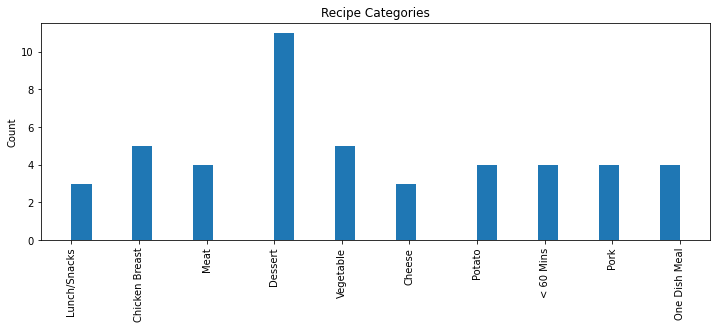

In [6]:
figCategories = plt.figure(figsize=(12, 4))
plt.hist(topCategoriesDataframe['RecipeCategory'], bins=30)
plt.title('Recipe Categories')
plt.ylabel('Count')
plt.xticks(rotation=90);

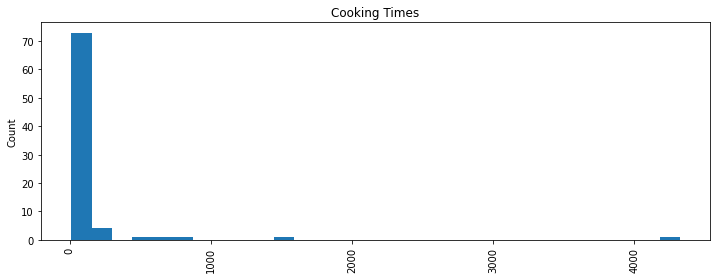

In [7]:
figTotalTime = plt.figure(figsize=(12, 4))
plt.hist(reducedData['TotalTime'], bins=30)
plt.title('Cooking Times')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [8]:
totalTimeRange = (15, 100)

filteredData = reducedData[(reducedData['TotalTime'] >= totalTimeRange[0]) & (reducedData['TotalTime'] <= totalTimeRange[1])]
filteredData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
1,Chicken a L 'orange,30.0,10.0,40.0,Lunch/Snacks,['orange' 'water' 'unsalted butter' 'skinless ...,"['Mix frozen orange juice with water, set asid..."
3,Prosciutto-Wrapped Chicken Breasts,15.0,10.0,25.0,Chicken Breast,['boneless skinless chicken breasts' 'black pe...,['Season the chicken with 1/2 teaspoon pepper ...
5,Root Beer Float Cupcakes,17.0,45.0,62.0,Dessert,['butter' 'eggs' 'all-purpose flour' 'baking p...,['Allow butter and eggs to stand at room tempe...
6,Sweet Plantain and Sausage Stuffing,35.0,30.0,65.0,Vegetable,['plantain' 'onion' 'raisins' 'turkey broth' '...,['Place chunks of plantains onto greased bakin...
9,Basketball Queso,20.0,15.0,35.0,Cheese,['unsalted butter' 'flour' 'salt' 'black peppe...,['Set a large saucepan over medium-high heat w...
